In [2]:
# This notebook creates piece images used in the app

rootdir = "streamlit_doubutsushogi/frontend/src/pieces"

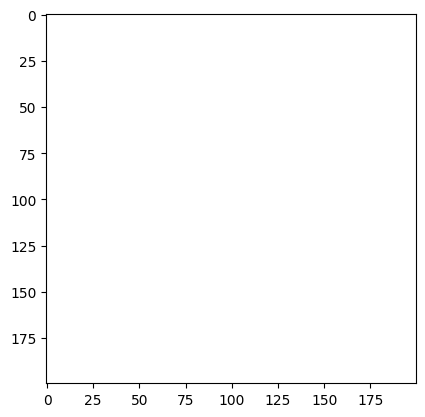

In [3]:
from PIL import Image
def make_empty_piece(height=200, width=200):
  img = Image.new('RGBA', (height, width), (255, 255, 255, 0))
  return img
empty = make_empty_piece()
empty.save(f"{rootdir}/empty.png")

import matplotlib.pyplot as plt
plt.imshow(empty)


hiyoko


/tmp/ipykernel_686448/2802794562.py:15: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  h, w = font.getsize(letter)


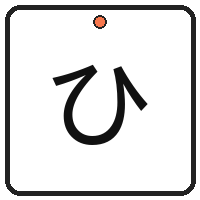

kirin


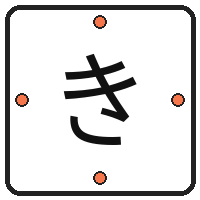

zou


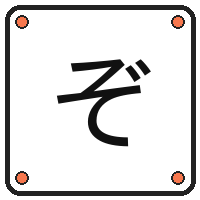

tori


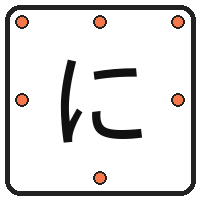

lion


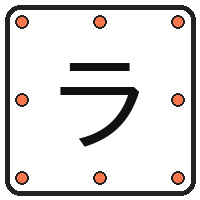

In [4]:
import os
from PIL import Image, ImageDraw, ImageFont

def make_letter_piece(letter, markers,
                      height=200, width=200, margin=5, markermargin=17, markersize=13,
                      background="#00000000", fillcolor="#ffffff", edgecolor="#222222", edgewidth=5, edgeradius=15,
                      fontpath="TakaoGothic.ttf", fontsize=110, fontcolor="#111111",
                      markerfillcolor="#f7774d", markeredgecolor="#222222", markerwidth=2):
  img = Image.new("RGBA", (height, width), background)
  draw = ImageDraw.Draw(img)
  draw.rounded_rectangle((margin, margin, height-margin, width-margin), fill=fillcolor, outline=edgecolor,
                         width=edgewidth, radius=edgeradius)

  font = ImageFont.truetype(fontpath, fontsize)
  h, w = font.getsize(letter)
  draw.text(((height-h)/2, (width-h)/2), letter, fontcolor, font=font)
  
  left = margin + markermargin - markersize/2
  right = width - margin - markermargin - markersize/2
  top = left
  bottom = right  
  for m in markers:
    i = int(m / 3)
    j = m % 3
    x = left + j*(right - left)/2
    y = top + i*(bottom - top)/2
    draw.ellipse((x, y, x+markersize, y+markersize), fill=markerfillcolor, outline=markeredgecolor, width=markerwidth)
  return img


# letter = "ひ"

# height, width = 200, 200
# markersize = 18
# margin = 5
# markerposition = margin + 10
images = {
  "hiyoko": make_letter_piece("ひ", (1, )),
  "kirin": make_letter_piece("き", (1, 3, 5, 7)),
  "zou": make_letter_piece("ぞ", (0, 2, 6, 8)),
  "tori": make_letter_piece("に", (0, 1, 2, 3, 5, 7)),
  "lion": make_letter_piece("ラ", (0, 1, 2, 3, 5, 6, 7, 8))
}

savefolder = f"{rootdir}/hiragana/"
os.makedirs(savefolder, exist_ok=True)
for name, img in images.items():
  print(name)
  display(img)
  img.save(os.path.join(savefolder, name + ".png"))

/tmp/ipykernel_686448/3189150336.py:17: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  h, w = font.getsize(letter)


hiyoko


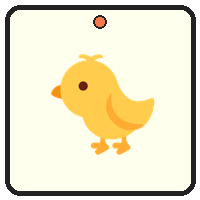

kirin


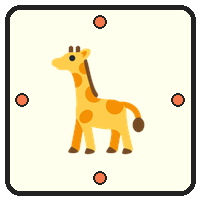

zou


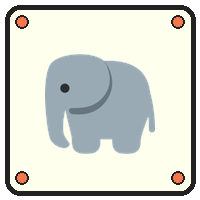

tori


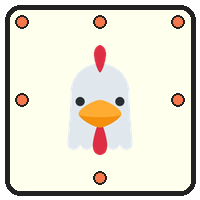

lion


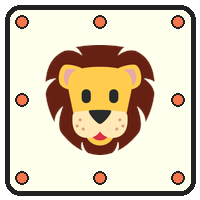

In [110]:
import os
from PIL import Image, ImageDraw, ImageFont
from pilmoji import Pilmoji
from pilmoji.source import TwemojiEmojiSource

def make_emoji_piece(letter, markers,
                     height=200, width=200, margin=5, markermargin=17, markersize=13,
                     background="#00000000", fillcolor="#ffffee", edgecolor="#222222", edgewidth=5, edgeradius=15,
                     fontpath="TakaoGothic.ttf", fontsize=110, fontcolor="#111111", emojisource=TwemojiEmojiSource,
                     markerfillcolor="#f7774d", markeredgecolor="#222222", markerwidth=2):
  img = Image.new("RGBA", (height, width), background)
  draw = ImageDraw.Draw(img)
  draw.rounded_rectangle((margin, margin, height-margin, width-margin), fill=fillcolor, outline=edgecolor,
                         width=edgewidth, radius=edgeradius)

  font = ImageFont.truetype(fontpath, fontsize)
  h, w = font.getsize(letter)
  emoji = Pilmoji(img, source=emojisource)
  emoji.text(((height-h)//2, (width-h)//2), letter, fontcolor, font=font)
  
  left = margin + markermargin - markersize/2
  right = width - margin - markermargin - markersize/2
  top = left
  bottom = right  
  for m in markers:
    i = int(m / 3)
    j = m % 3
    x = left + j*(right - left)/2
    y = top + i*(bottom - top)/2
    draw.ellipse((x, y, x+markersize, y+markersize), fill=markerfillcolor, outline=markeredgecolor, width=markerwidth)
  return img

images = {
  "hiyoko": make_emoji_piece("🐤", (1, )),
  "kirin": make_emoji_piece("🦒", (1, 3, 5, 7)),
  "zou": make_emoji_piece("🐘", (0, 2, 6, 8)),
  "tori": make_emoji_piece("🐔", (0, 1, 2, 3, 5, 7)),
  "lion": make_emoji_piece("🦁", (0, 1, 2, 3, 5, 6, 7, 8))
}

savefolder = f"{rootdir}/emoji1/"
os.makedirs(savefolder, exist_ok=True)
for name, img in images.items():
  print(name)
  display(img)
  img.save(os.path.join(savefolder, name + ".png"))

/tmp/ipykernel_686448/3189150336.py:17: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  h, w = font.getsize(letter)


hiyoko


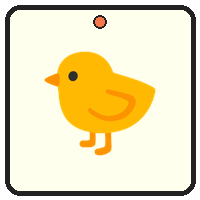

kirin


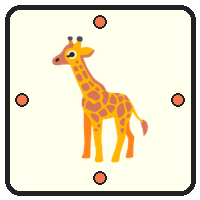

zou


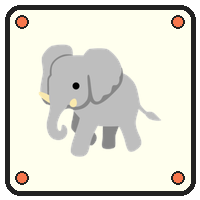

tori


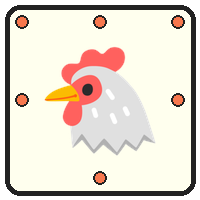

lion


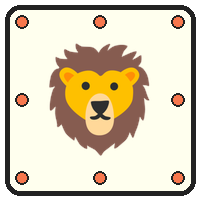

In [111]:
from pilmoji.source import GoogleEmojiSource
emojisource = GoogleEmojiSource
fontsize = 120

images = {
  "hiyoko": make_emoji_piece("🐤", (1, ), emojisource=emojisource, fontsize=fontsize),
  "kirin": make_emoji_piece("🦒", (1, 3, 5, 7), emojisource=emojisource, fontsize=135),
  "zou": make_emoji_piece("🐘", (0, 2, 6, 8), emojisource=emojisource, fontsize=130),
  "tori": make_emoji_piece("🐔", (0, 1, 2, 3, 5, 7), emojisource=emojisource, fontsize=fontsize),
  "lion": make_emoji_piece("🦁", (0, 1, 2, 3, 5, 6, 7, 8), emojisource=emojisource, fontsize=fontsize)
}

savefolder = f"{rootdir}/emoji2/"
os.makedirs(savefolder, exist_ok=True)
for name, img in images.items():
  print(name)
  display(img)
  img.save(os.path.join(savefolder, name + ".png"))

/tmp/ipykernel_686448/3189150336.py:17: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  h, w = font.getsize(letter)


hiyoko


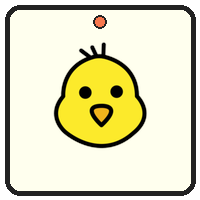

kirin


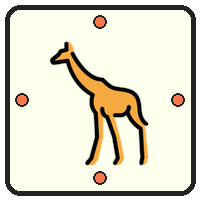

zou


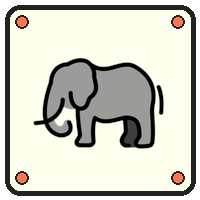

tori


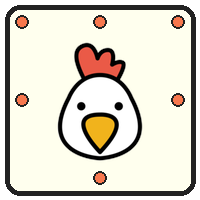

lion


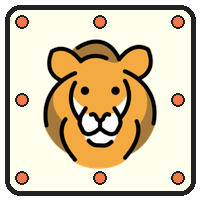

In [112]:
from pilmoji.source import OpenmojiEmojiSource
emojisource = OpenmojiEmojiSource
fontsize = 150

images = {
  "hiyoko": make_emoji_piece("🐤", (1, ), emojisource=emojisource, fontsize=fontsize),
  "kirin": make_emoji_piece("🦒", (1, 3, 5, 7), emojisource=emojisource, fontsize=fontsize),
  "zou": make_emoji_piece("🐘", (0, 2, 6, 8), emojisource=emojisource, fontsize=fontsize),
  "tori": make_emoji_piece("🐔", (0, 1, 2, 3, 5, 7), emojisource=emojisource, fontsize=fontsize),
  "lion": make_emoji_piece("🦁", (0, 1, 2, 3, 5, 6, 7, 8), emojisource=emojisource, fontsize=fontsize)
}

savefolder = f"{rootdir}/emoji3/"
os.makedirs(savefolder, exist_ok=True)
for name, img in images.items():
  print(name)
  display(img)
  img.save(os.path.join(savefolder, name + ".png"))

In [114]:
# resize images inplace
from PIL import Image
from glob import glob

def resize_fig(filepath, width, height):
  x = Image.open(filepath)
  x = x.resize((width, height))
  x.save(filepath)

for f in glob(f"{rootdir}/**/*.png", recursive=True):
  print(f, "...")
  resize_fig(f, 100, 100)

streamlit_doubutsushogi/frontend/src/pieces/empty.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji2/kirin.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji2/lion.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji2/zou.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji2/hiyoko.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji2/tori.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji1/kirin.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji1/lion.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji1/zou.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji1/hiyoko.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji1/tori.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji3/kirin.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji3/lion.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji3/zou.png ...
streamlit_doubutsushogi/frontend/src/pieces/emoji3/hiyoko.png ...
streamlit_doubutsushogi/frontend/src/pie